# <center>Titanic Survival Prediction</center>

## Importing libraries

In [247]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataframes

In [248]:
# Loading dataframe
df_gender = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\gender_submission.csv')
df_test = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\test.csv')
df_train = pd.read_csv(r'C:\Users\Prashant\Documents\Machine Learing Workspace\Titanic-Survival-Regression\.gitignore\train.csv')

## User defined functions

In [249]:
# UDF to determine the unique ticket status 
def unique_ticket_status(x):
    if(x > 1):
        unique=0
    else:
        unique=1
    return unique

In [250]:
# UDF to extract title from name
def extract_title(column):
    column = column.str.extract(' ([A-Za-z]+)\.', expand=False)
    return column 

In [251]:
## UDF to display the distribution of column after missing value treatment
def plot_age_distribution(before_imp , after_imp):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    sns.kdeplot(before_imp)
    plt.title("Age before imputation")
    plt.subplot(1, 2, 2) # index 2
    sns.kdeplot(after_imp)
    plt.title("Age after imputation")
    plt.show()

In [252]:
# UDF to calculate the MAPE for Age KPI to calculate accuracy
def mapeAge(dataframe,column,mean,median,mode):
    dataframe['mean_diff'] = (abs(dataframe.loc[:,column] - mean)/dataframe.loc[:,column])*100
    dataframe['median_diff'] = (abs(dataframe.loc[:,column] - median)/dataframe.loc[:,column])*100
    dataframe['mode_diff'] = (abs(dataframe.loc[:,column] - mode)/dataframe.loc[:,column])*100
    # dataframe['mean_age'] = mean
    # dataframe['median_age'] = median
    # dataframe['mode_age'] = mode
    print('Using mean , we are getting MAPE of ', round(np.mean(dataframe.loc[:,'mean_diff']),2))
    print('Using median , we are getting MAPE of ', round(np.mean(dataframe.loc[:,'median_diff']),2))
    print('Using mode , we are getting MAPE of ', round(np.mean(dataframe.loc[:,'mode_diff']),2),'\n')

In [253]:
# UDF to perform hot encoding on the labelled data
def hot_encoding(dataframe,column):
    encoded_df = pd.get_dummies(dataframe.loc[:,column], drop_first=True)
    frames = [dataframe,encoded_df]
    output_df = pd.concat(frames,axis=1)
    output_df.drop(columns=column,inplace=True)
    return output_df

In [254]:
# UDF to determine the travel class of passenger
def travel_class(column):
    column1 = column.apply(lambda x:'Tier 1' if(x == 1) else 'Tier 2' if (x==2) else 'Tier 3')
    return column1

In [255]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [256]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Null treatment

In [257]:
# Description of training data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [258]:
# Total null count in dataframe
print(df_train.isna().sum()/len(df_train)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [259]:
# Determining the title of passengers
df_train['Title'] = extract_title(df_train['Name'])
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [260]:
# Cabin column has 687 rows out of 891 is blank(78%) with a lot of distinct values which wont impact the model
# Removing title from name because there are too many unique values which wont impact the prediction
df_train.drop(columns=['Name','Cabin'],inplace=True)

## Null tratment for age column using regression

<AxesSubplot:xlabel='Age', ylabel='Density'>

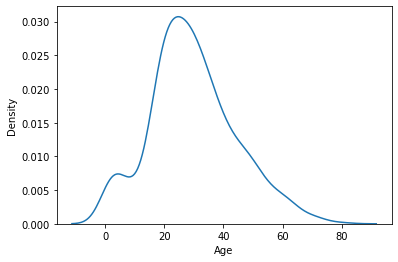

In [261]:
# Checking the distribution of age across the data
sns.kdeplot(df_train['Age'])

In [262]:
# It could be seen that there is very low correaltion between age and other columns so we cannot go for regression to predict the values for ages
df_train[~df_train['Age'].isna()].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


In [263]:
# The next steps is to use measures of central tendency 
mean_age = round(df_train[~df_train['Age'].isna()].loc[:,'Age'].mean(),2)
median_age = df_train[~df_train['Age'].isna()].loc[:,'Age'].median()
mode_age = df_train[~df_train['Age'].isna()].loc[:,'Age'].mode()
print('Average age of passenger: ', mean_age)
print('Median age of the passenger: ',median_age)
print('Most of the passengers are of age:',mode_age)

Average age of passenger:  29.7
Median age of the passenger:  28.0
Most of the passengers are of age: 0    24.0
dtype: float64


In [264]:
### Method 2: Using measures of central tendency to determine accuracy
# Lets use each of these and determine which gives much better accuracy
df_age_accuracy = pd.DataFrame(df_train[~df_train['Age'].isna()].loc[:,'Age'])

# INSIGHT : Cannot use measures of central tendency because the MAPE is too high which means the predicted values is way too far than the actual. eg. Predicted = 24, actual =2 , MAPE = 1100% which is extremely wrong causing the overall MAPE to be 144%
mapeAge(df_age_accuracy,'Age',mean_age,median_age,24)

Using mean , we are getting MAPE of  144.97
Using median , we are getting MAPE of  136.44
Using mode , we are getting MAPE of  118.96 



In [265]:
### Method 3: Use the titles to determine average age and impute it
df_train.groupby(['Title'],as_index=False)['PassengerId'].count().sort_values('PassengerId', ascending=False)

# Categorising titles other than Mr, Mrs, Master, Miss into others
df_train['Title'] = df_train['Title'].apply(lambda x: x if ((x=='Mr') or (x=='Mrs') or (x=='Miss') or (x=='Master')) else 'Other')
df_train.groupby(['Title'],as_index=False)['PassengerId'].count().sort_values('PassengerId', ascending=False)

# The observation is that the mean and median of age for all tiles are close and so we can fill the age for na using the titles itself
import pandas as pd
pd.options.mode.chained_assignment = None 
titles = df_train['Title'].unique()
df_title_age = df_train[~df_train['Age'].isna()].loc[:,['Title','Age']]
for i in titles:
    mean_title = round(df_title_age[df_title_age['Title']==i].loc[:,'Age'].mean(),2)
    median_title = df_title_age[df_title_age['Title']==i].loc[:,'Age'].median()
    print('Mean for title ',i,' is ',mean_title)
    print('Median for title ',i,' is ',median_title)

    df_title_age_accuracy = df_title_age[df_title_age['Title'] ==i].iloc[:,:]
    mapeAge(df_title_age_accuracy, 'Age', mean_title, median_title , 0)

# INSIGHT : For Mr, Mrs and Others the error is around 30 percent which is acceptable but for Master and Miss , the rror is exceeding 100 percent which is incorrect and unacceptable

Mean for title  Mr  is  32.37
Median for title  Mr  is  30.0
Using mean , we are getting MAPE of  34.21
Using median , we are getting MAPE of  30.92
Using mode , we are getting MAPE of  100.0 

Mean for title  Mrs  is  35.9
Median for title  Mrs  is  35.0
Using mean , we are getting MAPE of  30.68
Using median , we are getting MAPE of  29.77
Using mode , we are getting MAPE of  100.0 

Mean for title  Miss  is  21.77
Median for title  Miss  is  21.0
Using mean , we are getting MAPE of  174.07
Using median , we are getting MAPE of  167.82
Using mode , we are getting MAPE of  100.0 

Mean for title  Master  is  4.57
Median for title  Master  is  3.5
Using mean , we are getting MAPE of  168.24
Using median , we are getting MAPE of  125.82
Using mode , we are getting MAPE of  100.0 

Mean for title  Other  is  42.38
Median for title  Other  is  44.5
Using mean , we are getting MAPE of  31.29
Using median , we are getting MAPE of  32.56
Using mode , we are getting MAPE of  100.0 



### Method 3 : Impute Age using sex and pclass 

In [266]:
age_by_pclass_sex = df_train.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_train['Age'].median()))

# Filling the missing values in Age with the medians of Sex and Pclass groups
x = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


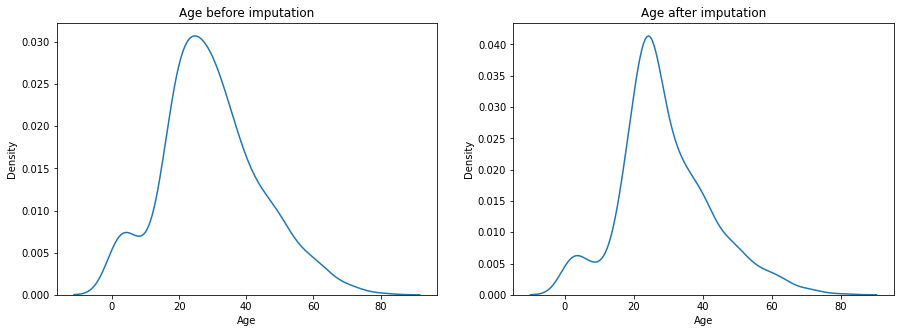

In [267]:
plot_age_distribution(df_train['Age'],x)

In [268]:
## Since the age distribution has remain same, we can impute the age columns using the median of sex and pclass
df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

## Categorical Variable Manipulation

### PClass, Embarked, Sex column manipulation

In [269]:
# Determining the travel class of passengers
df_train['Pclass'] = travel_class(df_train['Pclass']) 
df_train['Pclass'].unique()

array(['Tier 3', 'Tier 1', 'Tier 2'], dtype=object)

In [270]:
df_train = hot_encoding(df_train,'Embarked')
df_train = hot_encoding(df_train,'Sex')
df_train = hot_encoding(df_train,'Pclass')
df_train = hot_encoding(df_train,'Title')
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other
0,1,0,22.0,1,0,A/5 21171,7.2500,0,1,1,0,1,0,1,0,0
1,2,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,1,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1,0,0,0
3,4,1,35.0,1,0,113803,53.1000,0,1,0,0,0,0,0,1,0
4,5,0,35.0,0,0,373450,8.0500,0,1,1,0,1,0,1,0,0


In [271]:
df_train.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other
PassengerId,1.000000,-0.005007,0.039033,-0.057527,-0.001652,0.012658,-0.033606,0.022148,0.042939,-0.000086,-0.029486,-0.073110,0.038850,0.011245,0.068907
Survived,-0.005007,1.000000,-0.059579,-0.035322,0.081629,0.257307,0.003650,-0.155660,-0.543351,0.093349,-0.322308,0.327093,-0.549199,0.339040,0.022030
Age,0.039033,-0.059579,1.000000,-0.249854,-0.175526,0.122692,-0.092418,0.014208,0.102706,0.028805,-0.359129,-0.276135,0.196917,0.172910,0.175273
SibSp,-0.057527,-0.035322,-0.249854,1.000000,0.414838,0.159651,-0.026354,0.070941,-0.114631,-0.055932,0.092548,0.087932,-0.250489,0.063407,-0.036364
Parch,-0.001652,0.081629,-0.175526,0.414838,1.000000,0.216225,-0.081228,0.063036,-0.245489,-0.000734,0.015790,0.105567,-0.333905,0.225852,-0.067480
Fare,0.012658,0.257307,0.122692,0.159651,0.216225,1.000000,-0.117216,-0.166603,-0.182333,-0.118557,-0.413333,0.118271,-0.183766,0.105203,0.024585
Q,-0.033606,0.003650,-0.092418,-0.026354,-0.081228,-0.117216,1.000000,-0.496624,-0.074115,-0.127301,0.237449,0.171117,-0.078338,-0.089739,-0.007767
S,0.022148,-0.155660,0.014208,0.070941,0.063036,-0.166603,-0.496624,1.000000,0.125722,0.192061,-0.009511,-0.134000,0.118482,-0.002512,-0.051415
male,0.042939,-0.543351,0.102706,-0.114631,-0.245489,-0.182333,-0.074115,0.125722,1.000000,-0.064746,0.137143,-0.686808,0.867334,-0.547600,0.034471
Tier 2,-0.000086,0.093349,0.028805,-0.055932,-0.000734,-0.118557,-0.127301,0.192061,-0.064746,1.000000,-0.565210,-0.024652,-0.088569,0.121239,0.055384


### Ticket column manipulation

In [272]:
# While describing data, we got to know that ticket is not unique. So, in order to check the usability of the column, we might require manipulation
df_ticket_pass_count = df_train.groupby(['Ticket'],as_index=False)['PassengerId'].count().sort_values('PassengerId',ascending=False)

# Renaming the count of ticket column
df_ticket_pass_count.rename(columns={'Ticket':'Ticket','PassengerId':'Unique_ticket'},inplace=True)
df_ticket_pass_count.head(2)

,Ticket,Unique_ticket
80,1601,7
568,CA. 2343,7


<AxesSubplot:xlabel='Unique_ticket', ylabel='Density'>

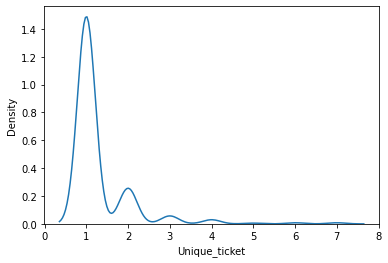

In [273]:
# Checking the distribution of unique tickets 
sns.kdeplot(df_ticket_pass_count['Unique_ticket'])

In [274]:
# Determining unique status of ticket
df_ticket_pass_count['Unique_ticket_status'] = df_ticket_pass_count['Unique_ticket'].apply(lambda x: 0 if x > 1 else 1)

In [275]:
# Removing the columns as it has been used to detemine unique ticket status
df_ticket_pass_count.drop(columns=['Unique_ticket'],inplace=True)

In [276]:
# Fetching the stauts of ticket in the original dataframe
df_train = df_train.merge(df_ticket_pass_count,how='left',on='Ticket')

In [277]:
df_train.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Unique_ticket_status
0,1,0,22.0,1,0,A/5 21171,7.2500,0,1,1,0,1,0,1,0,0,1
1,2,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,1,0,1
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,113803,53.1000,0,1,0,0,0,0,0,1,0,0
4,5,0,35.0,0,0,373450,8.0500,0,1,1,0,1,0,1,0,0,1


### Sibling and Parent column manipulation

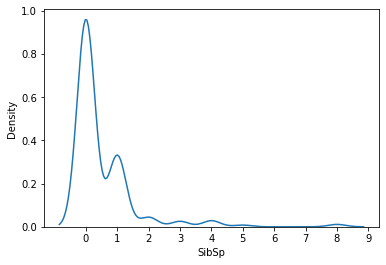

In [278]:
# Sibling count distribution
ax = sns.kdeplot(df_train['SibSp'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

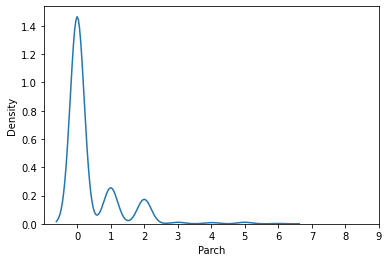

In [279]:
# Sibling count distribution
ax = sns.kdeplot(df_train['Parch'])
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
plt.show()

In [280]:
# From both the distribution above, we can categorize siblings and parents into one single feature that whether parent/sibling is present or not
df_train['Sibling_present'] = df_train.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
df_train['Parent_present'] = df_train.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)


In [281]:
df_train.drop(columns=['SibSp','Parch','Ticket','Fare'],inplace=True)
df_train.head()

,PassengerId,Survived,Age,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Unique_ticket_status,Sibling_present,Parent_present
0,1,0,22.0,0,1,1,0,1,0,1,0,0,1,1,1
1,2,1,38.0,0,0,0,0,0,0,0,1,0,1,1,1
2,3,1,26.0,0,1,0,0,1,1,0,0,0,1,0,0
3,4,1,35.0,0,1,0,0,0,0,0,1,0,0,1,1
4,5,0,35.0,0,1,1,0,1,0,1,0,0,1,0,0


In [282]:
# The data is properly classified betwen survived and died passnegers
df_train.groupby(['Survived'],as_index=False)['PassengerId'].count()

,Survived,PassengerId
0,0,549
1,1,342


## Applying manipulations on test data

In [288]:
# Determining the title of passengers
df_test['Title'] = extract_title(df_test['Name'])
df_test.drop(columns=['Name','Cabin'],inplace=True)
# Determining the travel class of passengers
df_test['Pclass'] = travel_class(df_test['Pclass']) 
# Categorising titles other than Mr, Mrs, Master, Miss into others
df_test['Title'] = df_test['Title'].apply(lambda x: x if ((x=='Mr') or (x=='Mrs') or (x=='Miss') or (x=='Master')) else 'Other')
df_test.groupby(['Title'],as_index=False)['PassengerId'].count().sort_values('PassengerId', ascending=False)
# Encoding categorical variable
df_test = hot_encoding(df_test,'Embarked')
df_test = hot_encoding(df_test,'Sex')
df_test = hot_encoding(df_test,'Pclass')
df_test = hot_encoding(df_test,'Title')
# While describing data, we got to know that ticket is not unique. So, in order to check the usability of the column, we might require manipulation
df_ticket_pass_count = df_test.groupby(['Ticket'],as_index=False)['PassengerId'].count().sort_values('PassengerId',ascending=False)
# Renaming the count of ticket column
df_ticket_pass_count.rename(columns={'Ticket':'Ticket','PassengerId':'Unique_ticket'},inplace=True)
# Determining unique status of ticket
df_ticket_pass_count['Unique_ticket_status'] = df_ticket_pass_count['Unique_ticket'].apply(lambda x: 0 if x > 1 else 1)
# Removing the columns as it has been used to detemine unique ticket status
df_ticket_pass_count.drop(columns=['Unique_ticket'],inplace=True)
# Fetching the stauts of ticket in the original dataframe
df_test = df_test.merge(df_ticket_pass_count,how='left',on='Ticket')
# From both the distribution above, we can categorize siblings and parents into one single feature that whether parent/sibling is present or not
df_test['Sibling_present'] = df_test.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
df_test['Parent_present'] = df_test.loc[:,'SibSp'].apply(lambda x : 0 if x==0 else 1)
df_test.drop(columns=['SibSp','Parch','Ticket','Fare'],inplace=True)
df_test.head()

,PassengerId,Age,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Unique_ticket_status,Sibling_present,Parent_present
0,892,34.5,1,0,1,0,1,0,1,0,0,1,0,0
1,893,47.0,0,1,0,0,1,0,0,1,0,1,1,1
2,894,62.0,1,0,1,1,0,0,1,0,0,1,0,0
3,895,27.0,0,1,1,0,1,0,1,0,0,1,0,0
4,896,22.0,0,1,0,0,1,0,0,1,0,1,1,1


In [286]:
df_train.head()

,PassengerId,Survived,Age,Q,S,male,Tier 2,Tier 3,Miss,Mr,Mrs,Other,Unique_ticket_status,Sibling_present,Parent_present
0,1,0,22.0,0,1,1,0,1,0,1,0,0,1,1,1
1,2,1,38.0,0,0,0,0,0,0,0,1,0,1,1,1
2,3,1,26.0,0,1,0,0,1,1,0,0,0,1,0,0
3,4,1,35.0,0,1,0,0,0,0,0,1,0,0,1,1
4,5,0,35.0,0,1,1,0,1,0,1,0,0,1,0,0


## Modeling 

In [290]:
from sklearn.preprocessing import StandardScaler
drop_cols1=['Survived', 'PassengerId']
drop_cols2=['PassengerId']
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols1))
y_train = df_train['Survived'].values.ravel()
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols2))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 13)
y_train shape: (891,)
X_test shape: (418, 13)
